In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from typing import List, Tuple

In [ ]:
class Graph:
    def __init__(self, nodes: List[int], edges: List[Tuple[int, int, dict]]):
        self.graph = nx.Graph()
        self.graph.add_nodes_from(nodes)
        self.graph.add_edges_from(edges)

    def get_neighbors(self, node: int) -> List[int]:
        return list(self.graph.neighbors(node))

    def get_edge_weight(self, node1: int, node2: int) -> float:
        return self.graph[node1][node2]['weight']

# Create a sample graph
nodes = [1, 2, 3, 4]
edges = [
    (1, 2, {'weight': 1}),
    (2, 3, {'weight': 2}),
    (3, 4, {'weight': 1}),
    (4, 1, {'weight': 3})
]
graph = Graph(nodes, edges)


In [ ]:
class AntColony:
    def __init__(self, graph: Graph, num_ants: int, alpha=1, beta=2, evaporation_rate=0.5, pheromone_init=0.1):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha  # Importance of pheromone
        self.beta = beta    # Importance of heuristic
        self.evaporation_rate = evaporation_rate
        self.pheromone = {edge: pheromone_init for edge in graph.graph.edges}

    def _probability(self, current: int, neighbor: int, visited: List[int]) -> float:
        pheromone = self.pheromone[(min(current, neighbor), max(current, neighbor))]
        heuristic = 1 / self.graph.get_edge_weight(current, neighbor)
        return (pheromone ** self.alpha) * (heuristic ** self.beta)

    def _choose_next_node(self, current: int, visited: List[int]) -> int:
        neighbors = [n for n in self.graph.get_neighbors(current) if n not in visited]
        if not neighbors:
            return None
        probabilities = [self._probability(current, n, visited) for n in neighbors]
        total = sum(probabilities)
        probabilities = [p / total for p in probabilities]
        return random.choices(neighbors, weights=probabilities, k=1)[0]

    def _update_pheromone(self, paths: List[Tuple[List[int], float]]):
        for edge in self.pheromone:
            self.pheromone[edge] *= (1 - self.evaporation_rate)
        for path, length in paths:
            for i in range(len(path) - 1):
                edge = (min(path[i], path[i+1]), max(path[i], path[i+1]))
                self.pheromone[edge] += 1 / length

    def find_path(self, start: int, end: int, iterations: int = 100) -> Tuple[List[int], float]:
        best_path, best_length = None, float('inf')
        for _ in range(iterations):
            paths = []
            for _ in range(self.num_ants):
                current, visited = start, [start]
                while current != end:
                    next_node = self._choose_next_node(current, visited)
                    if next_node is None:
                        break
                    visited.append(next_node)
                    current = next_node
                length = sum(self.graph.get_edge_weight(visited[i], visited[i+1]) for i in range(len(visited) - 1))
                paths.append((visited, length))
                if length < best_length:
                    best_path, best_length = visited, length
            self._update_pheromone(paths)
        return best_path, best_length


In [ ]:
# Initialize the Ant Colony
aco = AntColony(graph, num_ants=10)

# Find the optimal path
start, end = 1, 8
best_path, best_length = aco.find_path(start, end, iterations=50)

print(f"Best Path: {best_path}")
print(f"Path Length: {best_length}")


Best Path: [1, 2, 3, 4]
Path Length: 4


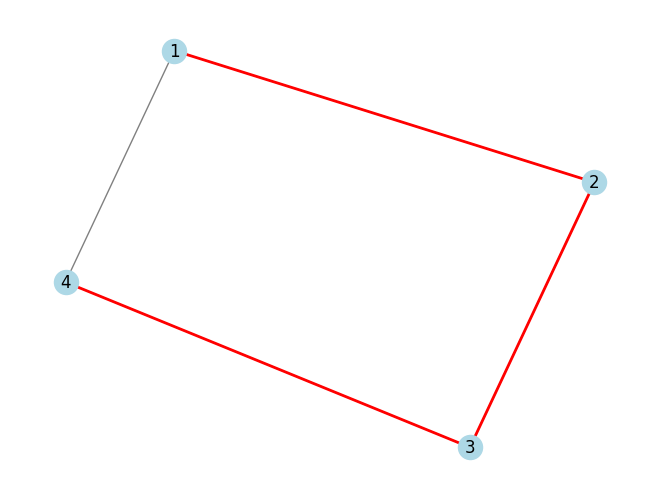

In [ ]:
def plot_graph(graph: Graph, path: List[int] = None):
    pos = nx.spring_layout(graph.graph)  # Layout for better visualization
    nx.draw(graph.graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')

    if path:
        path_edges = [(min(path[i], path[i+1]), max(path[i], path[i+1])) for i in range(len(path)-1)]
        nx.draw_networkx_edges(graph.graph, pos, edgelist=path_edges, edge_color='red', width=2)
    plt.show()

# Plot the graph with the best path
plot_graph(graph, best_path)
